In [5]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpuNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/205.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/205.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/205.4 MB 1.7 MB/s eta 0:02:05
     ---------------------------------------- 0.1/205.4 MB 1.4 MB/s eta 0:02:23
     ---------------------------------------- 0.2/205.4 MB 1.3 MB/s eta 0:02:37
     ---------------------------------------- 0.2/205.4 MB 1.4 MB/s eta 0:02:29
     ---------------------------------------- 0.3/205.4 MB 1.3 MB/s eta 0:02:37
     ---------------------------------------- 0.3/205.4 MB 1.3 MB/s eta 0:02:42
     ---------------------------------------- 0.3/205.4 MB 1.2 MB/s eta 0:02:51
     ---------------------------------------- 0.4/205.4 MB 1.2 MB/s eta 0:02:53
     ---------------------------------------- 0.5/205.4 MB 1.2 MB/s eta 0:02:48
     ------

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

C:\Users\cs\AppData\Local\Temp\ipykernel_8992\1428994717.py:15: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3687.)
  y = x @ true_weights.T + true_bias


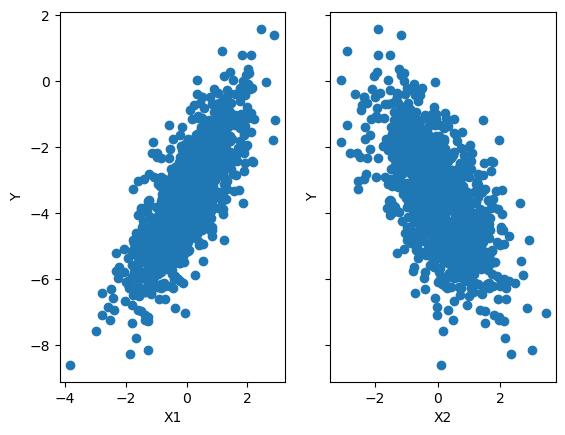

In [7]:
# set random seed for reproducibility
torch.manual_seed(42)

# set number of samples
num_samples = 1000

# create random features with 2 dimensions
x = torch.randn(num_samples, 2)

# create random weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias    = torch.tensor([-3.5])

# Target variable
y = x @ true_weights.T + true_bias

# Plot the dataset
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
plt.show()

In [8]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)

In [9]:
# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


In [10]:
y_p = model(x)
y_p[:5]

tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)

In [11]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss

tensor(19.9126, grad_fn=<MeanBackward0>)

Epoch [100/1000], weight:[[-0.2618025   0.44433367]], bias:[-0.17722966] Loss: 14.1803
Epoch [200/1000], weight:[[-0.21144076  0.35393426]], bias:[-0.78923583] Loss: 10.3030
Epoch [300/1000], weight:[[-0.17063746  0.2817266 ]], bias:[-1.289799] Loss: 7.7120
Epoch [400/1000], weight:[[-0.13759881  0.22408147]], bias:[-1.6992182] Loss: 5.9806
Epoch [500/1000], weight:[[-0.11086453  0.17808878]], bias:[-2.0340946] Loss: 4.8235
Epoch [600/1000], weight:[[-0.08924612  0.14141548]], bias:[-2.3080037] Loss: 4.0502
Epoch [700/1000], weight:[[-0.07177681  0.11219222]], bias:[-2.532051] Loss: 3.5333
Epoch [800/1000], weight:[[-0.05767059  0.08892147]], bias:[-2.7153137] Loss: 3.1878
Epoch [900/1000], weight:[[-0.04628877  0.0704043 ]], bias:[-2.865221] Loss: 2.9569
Epoch [1000/1000], weight:[[-0.03711249  0.05568102]], bias:[-2.987843] Loss: 2.8026


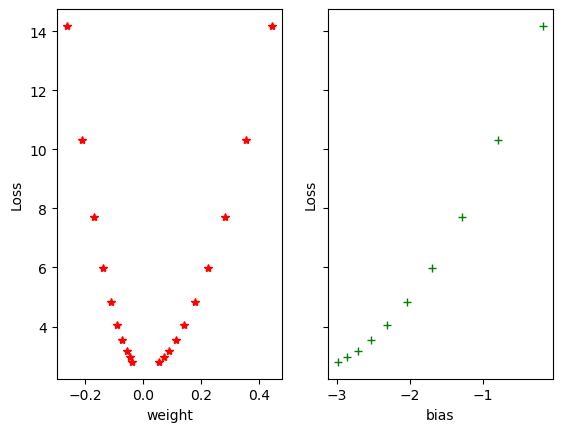

In [12]:
# Number of epochs
num_epochs = 1000

# Learning Rate
learning_rate = 0.01

# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)
    
    # Backproogation 
    # Find the fradient using 
    loss.backward()

    # Learning Rate
    learning_rate = 0.001

    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias

    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)
            
    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))
        
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()

In [13]:
w = model.linear.weight
b = model.linear.bias

print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(), 
  b.abs()))

weight(W) = tensor([[0.0371, 0.0557]], grad_fn=<AbsBackward0>) 
  bias(b) = tensor([2.9878], grad_fn=<AbsBackward0>)


In [14]:
pred =  x @ w.T + b
pred[:5]

tensor([[-2.9765],
        [-3.1385],
        [-3.0818],
        [-3.0756],
        [-2.8681]], grad_fn=<SliceBackward0>)